In [1]:
#load dependencies
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

## Israel Corona Lab Tests

In [4]:
# ## load data
# # url = 'https://data.gov.il/dataset/f54e79b2-3e6b-4b65-a857-f93e47997d9c/resource/dcf999c1-d394-4b57-a5e0-9d014a62e046/download/corona_lab_tests_ver_0072.csv'
# # df = pd.read_html(url)

# df = pd.read_csv('data/datagov/corona_lab_tests_ver_0075.csv')

# ## count values for each corona resuls
# df.groupby('corona_result').count()

,test_date,result_date,lab_id,test_for_corona_diagnosis,is_first_Test
corona_result,,,,,
בעבודה,658,645,658,658,658
חיובי,287388,287375,287389,287389,287389
חיובי גבולי,37173,37173,37173,37173,37173
לא בוצע/פסול 999,36935,36934,36935,36935,36935
לא ודאי,399,399,399,399,399
שלילי,3261658,3261382,3261660,3261660,3261660


In [5]:
# ##latest date
print(df.iloc[-1]['test_date'])

## convert date columns
def convertDateColumns(df):
    df.test_date = pd.to_datetime(df.test_date)
    df.result_date = pd.to_datetime(df.result_date)
    return df

2020-09-27


##### Days between Test and Result Date 

In [6]:
# ## add difference between days
# df_new = convertDateColumns(df[['test_date','result_date','corona_result']])
# df_new = df_new.assign(date_dif = (df_new.result_date - df_new.test_date))
# df_new = df_new.dropna().reset_index(drop=True)
# df_new['date_dif_days'] = df_new['date_dif'].apply(lambda x: x.days)
# df_new['test_weekday'] = df_new['test_date'].apply(lambda x: x.day_name())

# ## save to csv

# df_new.to_csv('data/datagov/corona_lab_tests_date_dif.csv', index=False)

C:\Users\eliav\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [5]:
#load saved date_dif csv
df = pd.read_csv('data/datagov/corona_lab_tests_date_dif.csv').drop(columns='date_dif')
df_new = convertDateColumns(df)

df_new.tail()

,test_date,result_date,corona_result,date_dif_days,test_weekday
3264239,2020-09-20,2020-09-20,חיובי,0,Sunday
3264240,2020-09-20,2020-09-20,שלילי,0,Sunday
3264241,2020-09-20,2020-09-20,שלילי,0,Sunday
3264242,2020-09-20,2020-09-20,חיובי,0,Sunday
3264243,2020-09-20,2020-09-20,שלילי,0,Sunday


In [6]:
## values with negative test-result date dif
neg_df = df_new.loc[df_new.date_dif_days < 0].sort_values(by='date_dif_days')
pct_neg = np.round((len(neg_df) / len(df_new) * 100),2)
print("# of negative values: {}; Percent: {}%".format(len(neg_df), pct_neg))

## remove negative values
df_clean =  df_new.loc[df_new.date_dif_days >= 0].reset_index(drop=True)

# of negative values: 831; Percent: 0.03%


In [7]:
df_clean 
# df_clean['test_weekday'] = df_clean['test_date'].dt.day_name
# df_clean['test_weekday'])

,test_date,result_date,corona_result,date_dif_days,test_weekday
0,2020-03-11,2020-03-11,חיובי,0,Wednesday
1,2020-03-11,2020-03-11,שלילי,0,Wednesday
2,2020-03-11,2020-03-11,חיובי,0,Wednesday
3,2020-03-11,2020-03-11,שלילי,0,Wednesday
4,2020-03-11,2020-03-11,שלילי,0,Wednesday
...,...,...,...,...,...
3263408,2020-09-20,2020-09-20,חיובי,0,Sunday
3263409,2020-09-20,2020-09-20,שלילי,0,Sunday
3263410,2020-09-20,2020-09-20,שלילי,0,Sunday
3263411,2020-09-20,2020-09-20,חיובי,0,Sunday


In [8]:
# ## bin to categories
# gdf = df_clean.groupby('date_dif_days')[['date_dif']].count()
# gdf['days_bin'] = pd.cut(gdf.index, [0,.5,5,10,20,50,100,150,200],
#                          labels=['0','1-5','5-10','10-20','20-50','50-100','100-150','>150'],include_lowest=True)

In [9]:
date_dif_bins = [0,1,2,3,4,5,10,50,200]
date_dif_labels = ['0','1','2','3','4','5-10','10-50','>50']
def binDateDifDf(df, bins=date_dif_bins, labels=date_dif_labels, adtl_group_cols=[]):
    #group by group_cols (default date_dif_days) and count lab tests for each
    group_cols = ['date_dif_days'] + adtl_group_cols
    gdf = df.groupby(group_cols).count()[['corona_result']].rename(columns={'corona_result':'tests_num'})
    gdf=gdf.reset_index()
    #bin dats
    gdf['days_bin'] = pd.cut(gdf.date_dif_days, bins=bins,
                         labels=labels, include_lowest=True, right=False)
    gdf['pct'] = (gdf['tests_num'] / gdf['tests_num'].sum() * 100)
    # gdf.loc[:3,'pct']
    
    gdf = gdf.set_index(group_cols)

    binned_gdf = gdf.groupby(['days_bin']+adtl_group_cols).sum()
    
    #reset_index
    return gdf, binned_gdf

In [10]:
## bin to categories - ALL TESTS
gdf, binned_gdf = binDateDifDf(df_clean)

## POSITIVE TESTS
df_positive = df_clean[df_clean.corona_result=='חיובי'].reset_index(drop=True)
gdf_positive, binned_gdf_positive = binDateDifDf(df_positive, bins=[0,1,2,3,4,5,10,50,200],
                                                 labels=['0','1','2','3','4','5-10','10-50','>50'])


## by weekday
df_clean['test_weekday'] = df_clean['test_weekday'].astype('category')
gdf_weekday, binned_gdf_weekday = binDateDifDf(df_clean, adtl_group_cols=['test_weekday'])




In [11]:
test = df_clean.loc[df_clean.test_date=='2020-03-13']
len(test.query("corona_result == 'חיובי'")) / len(test) * 100

5.208333333333334

In [12]:
df_clean

,test_date,result_date,corona_result,date_dif_days,test_weekday
0,2020-03-11,2020-03-11,חיובי,0,Wednesday
1,2020-03-11,2020-03-11,שלילי,0,Wednesday
2,2020-03-11,2020-03-11,חיובי,0,Wednesday
3,2020-03-11,2020-03-11,שלילי,0,Wednesday
4,2020-03-11,2020-03-11,שלילי,0,Wednesday
...,...,...,...,...,...
3263408,2020-09-20,2020-09-20,חיובי,0,Sunday
3263409,2020-09-20,2020-09-20,שלילי,0,Sunday
3263410,2020-09-20,2020-09-20,שלילי,0,Sunday
3263411,2020-09-20,2020-09-20,חיובי,0,Sunday


In [62]:
total_tests.index.min()

Timestamp('2020-03-11 00:00:00')

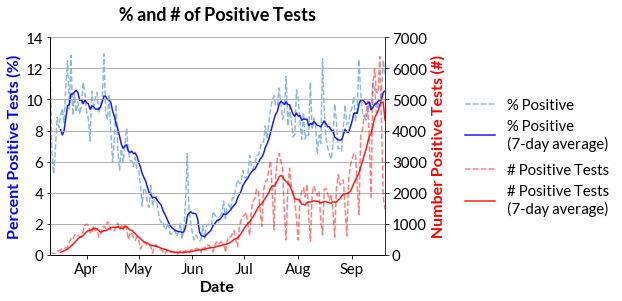

In [92]:
def findPctPositive(df):
    num_positive = len(df.loc[df.corona_result=='חיובי'])
    total_test = len(df)
    return num_positive/total_test*100

positive = lambda x: len(x.loc[x.corona_result=='חיובי'])
pct_positive = df_clean.groupby('test_date')[['corona_result']].apply(lambda x: findPctPositive(x))
total_tests = df_clean.groupby('test_date')[['corona_result']].apply(positive)

## graph 
import matplotlib.dates as mdates
import matplotlib.cbook as cbook


fig,ax = plt.subplots()
ax.plot(pct_positive, alpha=0.5, linestyle='--', label='% Positive')

axt = ax.twinx()
axt.plot(total_tests,color='red', alpha=0.5, linestyle='--', label='# Positive Tests')

ax.plot(pct_positive.rolling(7).mean(), alpha=0.9, color='blue', label='% Positive\n(7-day average)')
axt.plot(total_tests.rolling(7).mean() ,color='red', alpha=0.9, linestyle='-', label='# Positive Tests\n(7-day average)')

months = mdates.MonthLocator()  # every month
months_fmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)
ax.spines['right'].set_visible(True)
axt.set_ylim(0,7000)
ax.set_ylim(0,14)
ax.set_xlim(total_tests.index.min(), total_tests.index.max())
##legend
ax.legend(bbox_to_anchor=(1.2,.6), loc='center left', frameon=False)
axt.legend(bbox_to_anchor=(1.2,.3), loc='center left', frameon=False)
## labels and titles
ax.set_xlabel('Date')
ax.set_ylabel('Percent Positive Tests (%)', color='blue')
axt.set_ylabel('Number Positive Tests (#)', color='red')

ax.set_title("% and # of Positive Tests",y=1.05,)
fig.savefig('graphs/percent_number_positive.jpg', dpi=300, bbox_inches='tight')

In [54]:
# binned_gdf_weekday.tail(14)

In [23]:
# ## max days
# df_positive.sort_values(by='date_dif_days', ascending=False)
# df_clean[df_clean.corona_result=='חיובי'].sort_values(by='date_dif_days', ascending=False)

### Graphs

In [91]:
## mpl rcParams

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['axes.labelsize'] = 16
rcParams['axes.labelweight'] = 'bold'
rcParams['font.family'] = 'Lato'
rcParams['font.size'] = 15
rcParams["axes.grid"] =True
rcParams["axes.grid.axis"] ="y"
rcParams['axes.axisbelow'] = True
rcParams['axes.titleweight'] = 'bold'

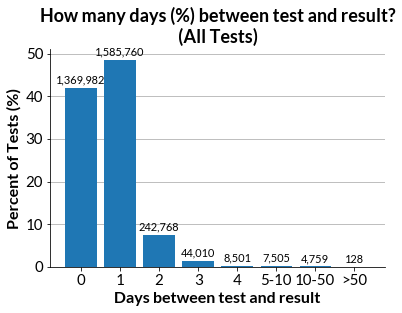

In [65]:
## ALL TEST - % by Date Dif Bins
fig, ax = plt.subplots()
ax.bar(binned_gdf.index, binned_gdf.pct)
ax.set_ylabel('Percent of Tests (%)')
ax.set_xlabel('Days between test and result')
for i, (val, pct) in enumerate(zip(binned_gdf['tests_num'],binned_gdf['pct'])):
    ax.text(i, pct+1, format(val, ','), ha='center', size=11)
ax.set_title("How many days (%) between test and result?\n(All Tests)", y=1, weight='bold')
fig.savefig("graphs/days_between_test_results.jpg", dpi=300, bbox_inches='tight')

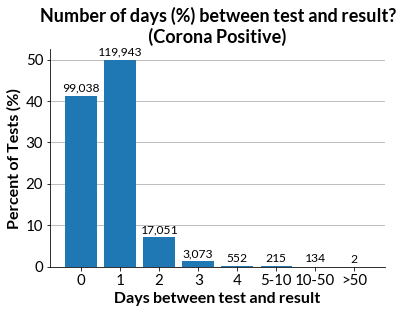

In [66]:
## POSITIVE TESTS - % by Date Dif Bins

fig, ax = plt.subplots()
ax.bar(binned_gdf_positive.index, binned_gdf_positive.pct)
ax.set_ylabel('Percent of Tests (%)')
ax.set_xlabel('Days between test and result')
for i, (val, pct) in enumerate(zip(binned_gdf_positive['tests_num'],binned_gdf_positive['pct'])):
    ax.text(i, pct+1, format(val, ','), ha='center', size=12)
ax.set_title("Number of days (%) between test and result?\n(Corona Positive)", y=1, weight='bold')
fig.savefig("graphs/days_between_test_results_corona_positive.jpg", dpi=300, bbox_inches='tight')

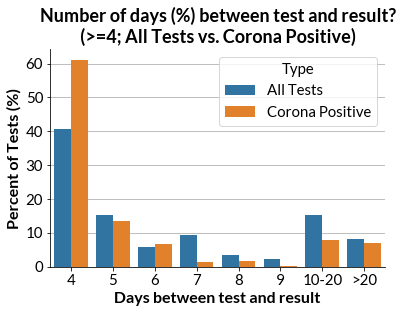

In [70]:
## compare 4+ all test and positive pct
gdf2, binned_gdf2 = binDateDifDf(df_clean.query("date_dif_days >=4"), bins=[4,5,6,7,8,9,10,20,200],
                                                 labels=['4','5','6','7','8','9','10-20','>20'])
gdf_positive2, binned_gdf_positive2 = binDateDifDf(df_positive.query("date_dif_days >=4"), bins=[4,5,6,7,8,9,10,20,200],
                                                 labels=['4','5','6','7','8','9','10-20','>20'])

binned_gdf2 = binned_gdf2.reset_index()
binned_gdf2['type'] = 'All Tests'
binned_gdf_positive2 = binned_gdf_positive2.reset_index()
binned_gdf_positive2['type'] = 'Corona Positive'
binned_gdf_merged = binned_gdf2.append(binned_gdf_positive2, ignore_index=True)
binned_gdf_merged
ax = sns.barplot(x='days_bin', y='pct', hue='type', data=binned_gdf_merged)
ax.set_ylabel('Percent of Tests (%)')
ax.set_xlabel('Days between test and result')
ax.get_legend().set_title('Type')
ax.set_title("Number of days (%) between test and result?\n(>=4; All Tests vs. Corona Positive)", y=1, weight='bold')
ax.figure.savefig("graphs/4plus_days_between_test_results_all_vs_corona_positive.jpg", dpi=300, bbox_inches='tight')

##### By Weekday

In [ ]:
## prep weekday df
df = binned_gdf_weekday.reset_index()
df['weekday_num'] = [1 if x=='Sunday' else 2 if x=='Monday' else 3 if x=='Tuesday' else
                    4 if x=='Wednesday' else 5 if x =='Thursday' else 6 if x =='Friday'
                    else 7 for x in df['test_weekday']]
## add pct of each days bin per weekday
df2 = pd.DataFrame()
for wday_num in np.arange(7)+1:
    wday_df = df.loc[df.weekday_num==wday_num]
    wday_df = wday_df.assign(pct_wday=(wday_df['tests_num'] / wday_df['tests_num'].sum() * 100))
    df2 = df2.append(wday_df, ignore_index=True)


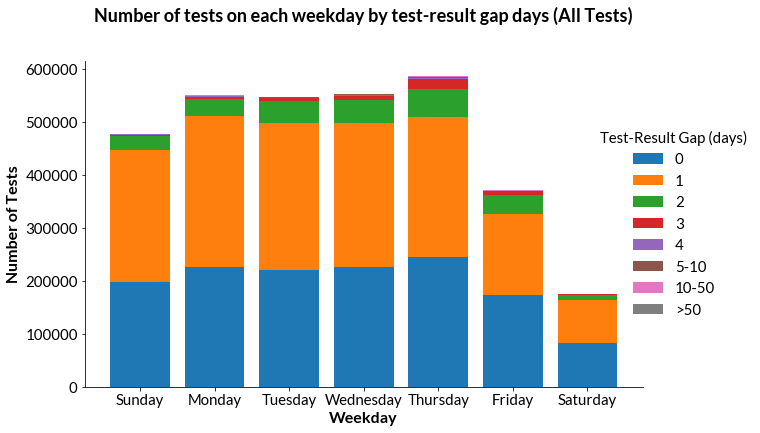

In [28]:
## num tests by weekday
fig, ax = plt.subplots(figsize=(10,6))
bottom = np.zeros(7)

for abin in df.days_bin.unique():
    bin_df = df.loc[df.days_bin == abin].sort_values(by='weekday_num').reset_index(drop=True)
    ax.bar(bin_df['test_weekday'],bin_df['tests_num'], bottom=bottom,label=abin)
    bottom = bottom+bin_df['tests_num']
ax.legend(bbox_to_anchor=(.9,.5), loc='center left', title='Test-Result Gap (days)', frameon=False)
## labels and legend, save
ax.set_ylabel('Number of Tests')
ax.set_xlabel('Weekday')
ax.set_title("Number of tests on each weekday by test-result gap days (All Tests)", y=1.1, weight='bold')
fig.savefig("graphs/number_tests_by_weekday_test_result_gap.jpg", dpi=300, bbox_inches='tight')


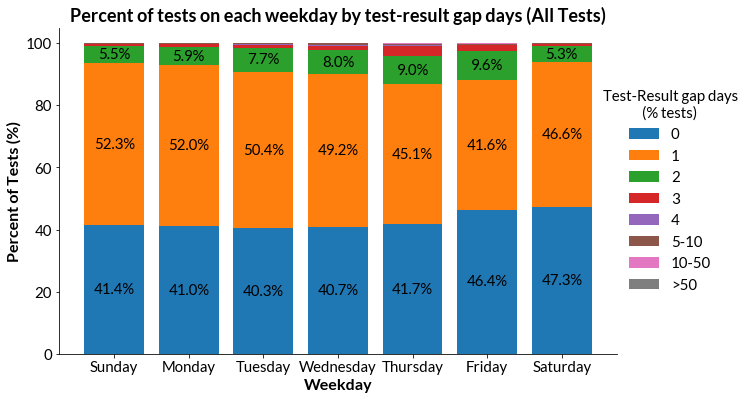

In [29]:
## num tests by weekday
fig, ax = plt.subplots(figsize=(10,6))
bottom = np.zeros(7)

for abin in df2.days_bin.unique():
    bin_df = df2.loc[df2.days_bin == abin].sort_values(by='weekday_num').reset_index(drop=True)
    ax.bar(bin_df['test_weekday'],bin_df['pct_wday'], bottom=bottom,label=abin)
    ## add text
    for i, pct in enumerate(bin_df['pct_wday']):
        if pct >=5:
            loc=(pct/2+bottom[i])
            ax.text(i, loc, '{}%'.format(np.round(pct,1)), ha='center',va='center')
    ##new bottom
    bottom = bottom+bin_df['pct_wday']

## legend
leg = ax.legend(bbox_to_anchor=(.95,.5), loc='center left', title='Test-Result gap days\n(% tests)',
                frameon=False)
# leg._legend_box.align = "center"
plt.setp(leg.get_title(), multialignment='center')

## labels and legend, save
ax.set_ylabel('Percent of Tests (%)')
ax.set_xlabel('Weekday')
ax.set_title("Percent of tests on each weekday by test-result gap days (All Tests)", y=1, weight='bold')
fig.savefig("graphs/percent_tests_by_weekday_test_result_gap.jpg", dpi=300, bbox_inches='tight')

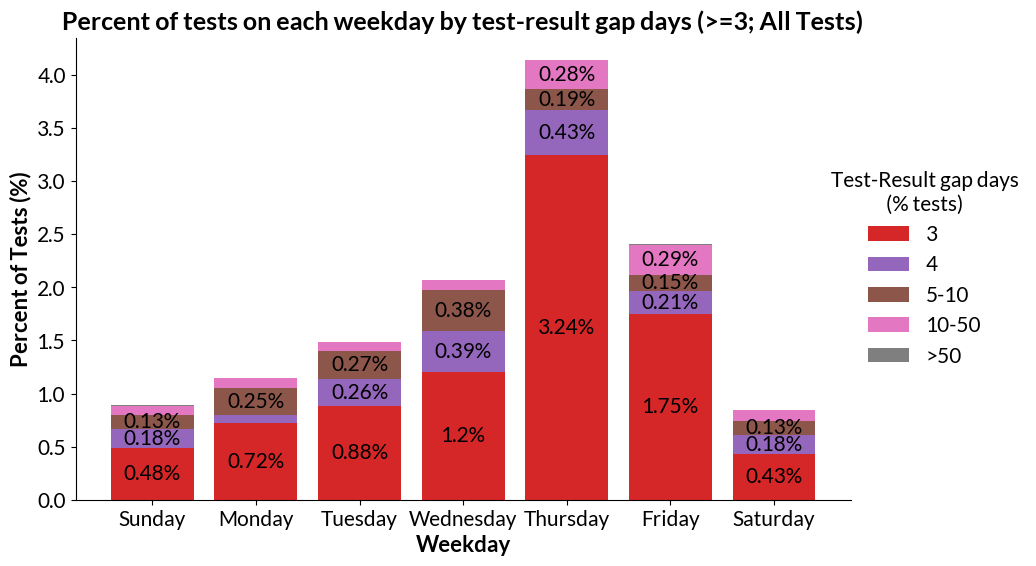

In [116]:
## num tests by weekday

##color
prop_cycle = plt.rcParams['axes.prop_cycle']
rcParams['axes.prop_cycle'] = prop_cycle[3:]

#fig
fig, ax = plt.subplots(figsize=(10,6))
bottom = np.zeros(7)
df3 = df2.loc[~df2.days_bin.isin(['0','1','2'])].reset_index(drop=True)
for abin in df3.days_bin.unique():
    bin_df = df3.loc[df3.days_bin == abin].sort_values(by='weekday_num').reset_index(drop=True)
    ax.bar(bin_df['test_weekday'],bin_df['pct_wday'], bottom=bottom,label=abin)
    ## add text
    for i, pct in enumerate(bin_df['pct_wday']):
        if pct >=0.1:
            loc=(pct/2+bottom[i])
            ax.text(i, loc, '{}%'.format(np.round(pct,2)), ha='center',va='center')
    ##new bottom
    bottom = bottom+bin_df['pct_wday']

## legend
leg = ax.legend(bbox_to_anchor=(.95,.5), loc='center left', title='Test-Result gap days\n(% tests)',
                frameon=False)
# leg._legend_box.align = "center"
plt.setp(leg.get_title(), multialignment='center')

##return color defaults
rcParams['axes.prop_cycle'] = prop_cycle


## labels and legend, save
ax.set_ylabel('Percent of Tests (%)')
ax.set_xlabel('Weekday')
ax.set_title("Percent of tests on each weekday by test-result gap days (>=3; All Tests)", y=1, weight='bold')
fig.savefig("graphs/percent_tests_by_weekday_test_result_gap_3plus.jpg", dpi=300, bbox_inches='tight')

In [136]:
# import requests, time, pandas as pd
# v.il/api/3/action/datastore_search?resource_id=dcf999c1-d394-4b57-a5e0-9d014a62e046&limit={}&offset={}'.format(limit, offset)
    
#     while notEmpty:
#         r = requests.get(url)
#         json = r.json()['result']['records']
#         df = pd.DataFrame(json)
#         if len(df)>0:
#             fulldf = fulldf.append(df)
#             limit += 10000
#             offset += 10000
#         else:
#             notEmpty=False
#         time.sleep(.5)
    
#     return finaldf

# finaldf = loadLabData()


In [137]:
# import requests, pandas as pd
# url = 'https://data.gov.il/api/3/action/datastore_search?resource_id=dcf999c1-d394-4b57-a5e0-9d014a62e046&limit=5&offset=5'  
# r = requests.get(url)
# json = r.json()['result']['records']
# df = pd.DataFrame(json)
# df.head()